DATASET:

In [155]:
import pandas as pd


In [156]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# Set working directory
%cd /content/drive/MyDrive/
df = pd.read_csv('international_matches.csv')

/content/drive/MyDrive


In [158]:
df

international_matches 2
date       home_team      away_team    home_team_continent away_team_continent home_team_fifa_rank away_team_fifa_rank home_team_total_fifa_points away_team_total_fifa_points home_team_score away_team_score tournament                   city     country        neutral_location shoot_out home_team_result home_team_goalkeeper_score away_team_goalkeeper_score home_team_mean_defense_score home_team_mean_offense_score home_team_mean_midfield_score away_team_mean_defense_score away_team_mean_offense_score  away_team_mean_midfield_score
1993-08-08 Bolivia        Uruguay      South America       South America       59                  22                  0                           0                           3               1               FIFA World Cup qualification La Paz   Bolivia        FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Brazil         Mexico       South America       North America       8                   14                  0                           0                           1               1               Friendly                     Maceió   Brazil         FALSE            No        Draw             NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Ecuador        Venezuela    South America       South America       35                  94                  0                           0                           5               0               FIFA World Cup qualification Quito    Ecuador        FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Guinea         Sierra Leone Africa              Africa              65                  86                  0                           0                           1               0               Friendly                     Conakry  Guinea         FALSE            No        Win              NaN                        NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ...
2022-06-14 Moldova        Andorra      Europe              Europe              180                 153                 932                         1040                        2               1               UEFA Nations League          Chișinău Moldova        FALSE            No        Win              65.0                       NaN                        NaN                          NaN                          NaN                           NaN                          NaN                                                     NaN
           Liechtenstein  Latvia       Europe              Europe              192                 135                 895                         1105                        0               2               UEFA Nations League     

* What are the data types? (Only numeric and categorical) – Code & Output:

In [175]:
# Display data types of each column
df.dtypes


date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

* Are there missing values? – Code & Output:

In [176]:
# Check for missing values in each column
print(df.isnull().sum())


date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64


* What are the likely distributions of the numeric variables? – Code & Output:

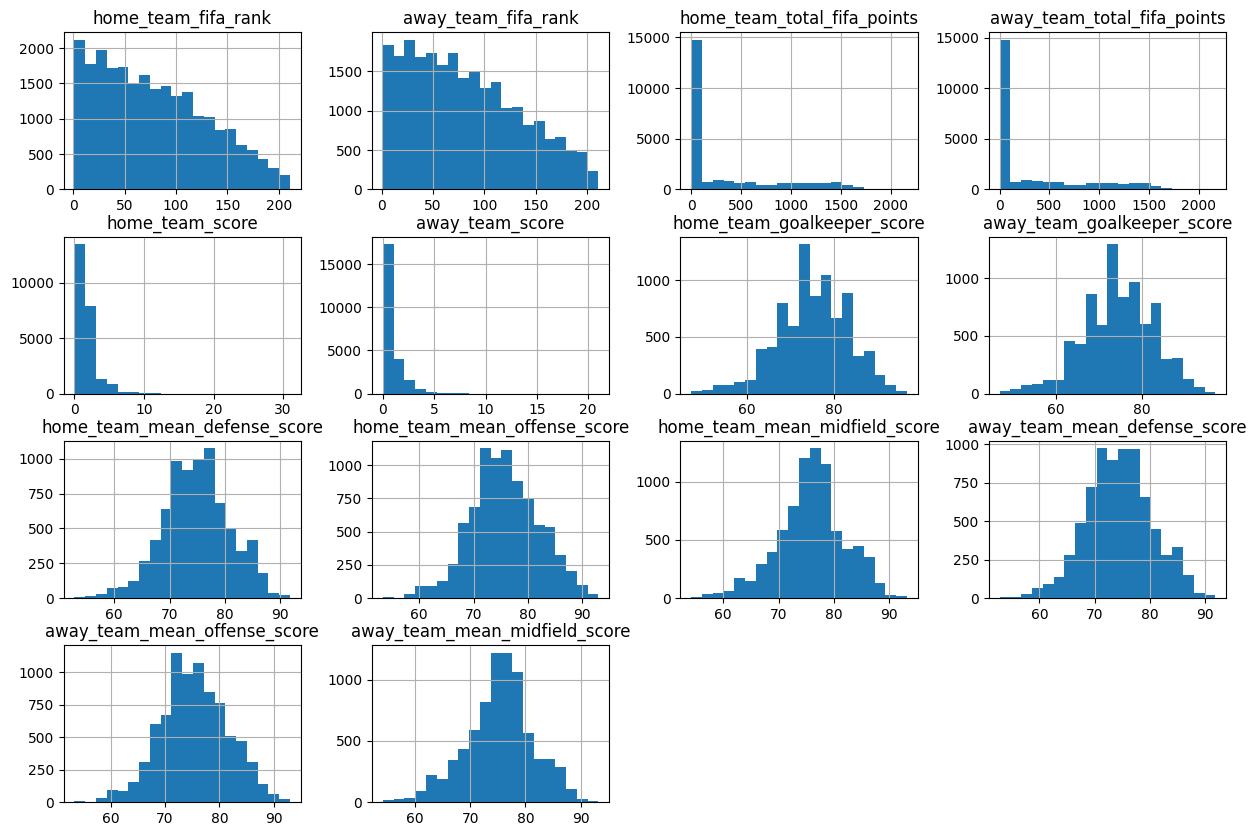

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = df.select_dtypes(include=['int64', 'float64'])
numeric_data.hist(bins=20, figsize=(15, 10))
plt.show()


** Which independent variables are useful to predict a target (dependent variable)? (Use at least three
methods) – Code & Output:
a) Correlation Analysis:

                               home_team_fifa_rank  away_team_fifa_rank  \
home_team_fifa_rank                       1.000000             0.496644   
away_team_fifa_rank                       0.496644             1.000000   
home_team_total_fifa_points              -0.177332            -0.045389   
away_team_total_fifa_points              -0.061516            -0.158492   
home_team_score                          -0.127667             0.298982   
away_team_score                           0.219087            -0.158206   
home_team_goalkeeper_score               -0.640102            -0.248486   
away_team_goalkeeper_score               -0.210219            -0.626912   
home_team_mean_defense_score             -0.712681            -0.241540   
home_team_mean_offense_score             -0.706093            -0.254718   
home_team_mean_midfield_score            -0.736180            -0.256242   
away_team_mean_defense_score             -0.197999            -0.698827   
away_team_mean_offense_sc

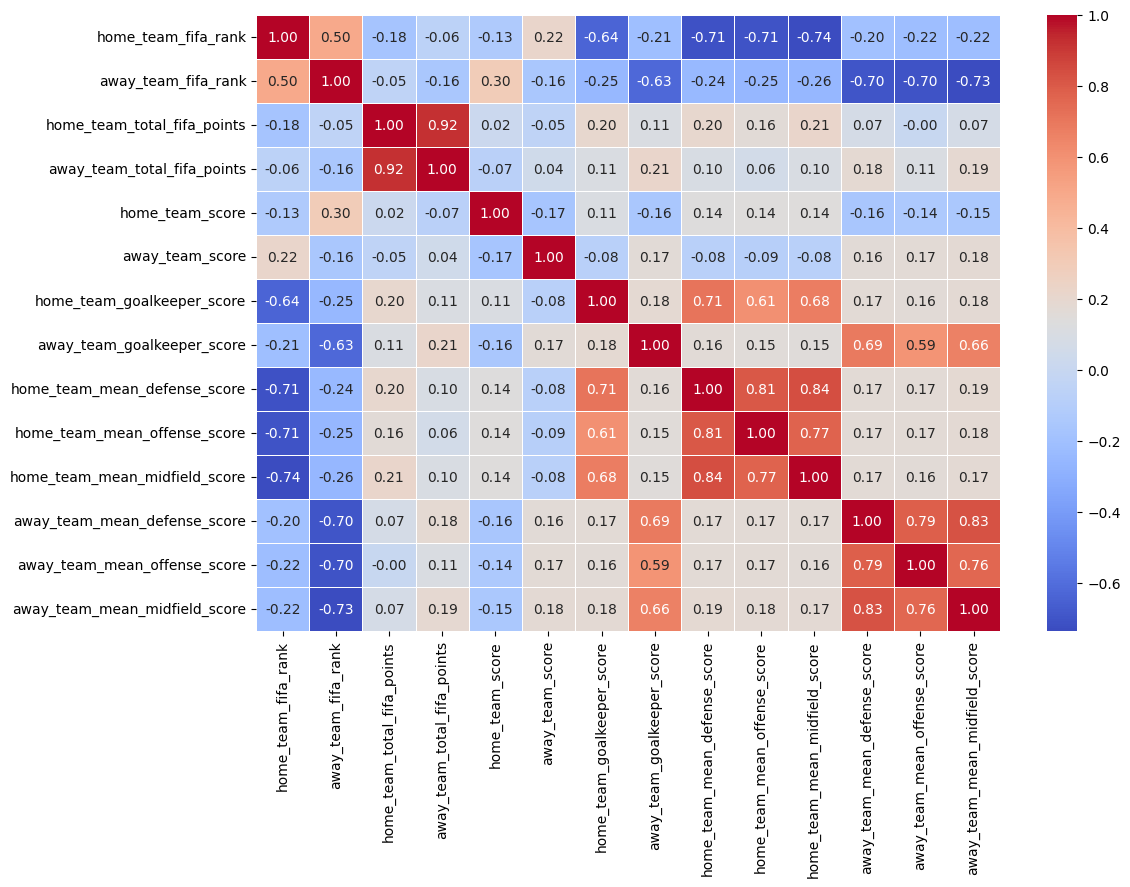

In [181]:
import pandas as pd

# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


Feature Importance using Random Forest Classifier:

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = df.drop(['date', 'home_team_result'], axis=1)
y = df['home_team_result']

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the dataframe
display(features_df)


,Feature,Importance
8,home_team_score,0.385274
9,away_team_score,0.339572
5,away_team_fifa_rank,0.034551
4,home_team_fifa_rank,0.034346
11,city,0.019251
1,away_team,0.018768
0,home_team,0.016289
12,country,0.016233
10,tournament,0.012015
21,away_team_mean_offense_score,0.011383


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

This code uses a Random Forest Regressor to estimate feature importances. It prints the features and
their corresponding importances in descending order.

c) Recursive Feature Elimination:

In [229]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is your feature matrix and y_train is your target variable
# Adjust the model and parameters accordingly based on your specific problem

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model = LinearRegression()

# Specify the number of features you want to select (adjust as needed)
num_features_to_select = 5

rfe = RFE(model, n_features_to_select=num_features_to_select)
fit = rfe.fit(X_train, y_train_encoded)  # Use the encoded target variable

# Display the ranking and support of each feature
selected_features = X_train.columns[fit.support_]
print("Selected Features:", selected_features)

# Display the ranking of each feature
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_})
feature_ranking.sort_values(by='Ranking', inplace=True)
print("\nFeature Ranking:")
print(feature_ranking)


Selected Features: Index(['home_team_continent', 'home_team_score', 'away_team_score',
       'neutral_location', 'shoot_out'],
      dtype='object')

Feature Ranking:
                          Feature  Ranking
8                 home_team_score        1
14                      shoot_out        1
2             home_team_continent        1
13               neutral_location        1
9                 away_team_score        1
16     away_team_goalkeeper_score        2
18   home_team_mean_offense_score        3
15     home_team_goalkeeper_score        4
3             away_team_continent        5
5             away_team_fifa_rank        6
4             home_team_fifa_rank        7
10                     tournament        8
20   away_team_mean_defense_score        9
22  away_team_mean_midfield_score       10
1                       away_team       11
19  home_team_mean_midfield_score       12
21   away_team_mean_offense_score       13
0                       home_team       14
11             

This code performs RFE using a Linear Regression model and selects a specified number of features (in
this case, 5). It then prints the selected features and their rankings. Adjust the num_features_to_select
variable based on how many features you want to include in your model.

* Which independent variables have missing data? How much? – Code & Output:

In [183]:
# Display columns with missing values and their counts along with the percentage
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_data[missing_data > 0],
    'Percentage': missing_percentage[missing_data > 0]
})

print(missing_info)



                               Missing Values  Percentage
home_team_goalkeeper_score              15542   64.972200
away_team_goalkeeper_score              15826   66.159441
home_team_mean_defense_score            16134   67.447013
home_team_mean_offense_score            15411   64.424564
home_team_mean_midfield_score           15759   65.879353
away_team_mean_defense_score            16357   68.379248
away_team_mean_offense_score            15609   65.252289
away_team_mean_midfield_score           15942   66.644371


It adds a new DataFrame (missing_info) that includes both the count of missing values and their
percentage for columns with missing data. This information can be helpful to assess the extent of
missing values in each column relative to the total number of observations in the dataset.

* Do the training and test sets have the same data? – Code & Output:

In [221]:
df_train = df.sample(frac = 0.8)

In [222]:
df_train = df.sample(frac = 0.2)

In [223]:
# Check if there are common rows between training and test sets
common_rows = df_train.index.intersection(df_test.index)

if common_rows.empty:
    print("No common rows found.")
else:
    print(f"Number of common rows: {len(common_rows)}")
    print("Indices of common rows:")
    print(common_rows)


Number of common rows: 957
Indices of common rows:
Int64Index([18300, 23091,   324,  9586, 21313,  2712,  5357,  4002,   918,
             9600,
            ...
            18358, 21497,  8320, 17404, 19490,  3272, 16482,  9933, 23298,
             3151],
           dtype='int64', length=957)


This not only checks for common rows but also prints the number of common rows and their indices if
they exist. It provides more detailed information about the commonality between the training and test
sets.

* In the predictor variables independent of all the other predictor variables? Code & Output:

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Check for and handle inf and nan values
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.dropna(inplace=True)

# Compute VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)



<ipython-input-232-014156b324c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-232-014156b324c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.dropna(inplace=True)


                         Variable          VIF
0             home_team_fifa_rank     5.290403
1             away_team_fifa_rank     5.708373
2     home_team_total_fifa_points    28.554029
3     away_team_total_fifa_points    27.595466
4                 home_team_score     2.586509
5                 away_team_score     2.197783
6      home_team_goalkeeper_score   281.978584
7      away_team_goalkeeper_score   245.267485
8    home_team_mean_defense_score  1006.000290
9    home_team_mean_offense_score   611.778559
10  home_team_mean_midfield_score   964.367894
11   away_team_mean_defense_score   912.805094
12   away_team_mean_offense_score   619.183414
13  away_team_mean_midfield_score   863.549783


* Which predictor variables are the most important? – Code & Output:

In [239]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = 'international_matches.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in key columns
key_columns = ['home_team_result', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
               'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
               'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
data.dropna(subset=key_columns, inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['home_team_result'] = le.fit_transform(data['home_team_result'])

# Define predictor variables and target variable
X = data[key_columns[1:]] # Exclude 'home_team_result' from predictors
y = data['home_team_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                         Feature  Importance
7  away_team_mean_midfield_score    0.136705
2   home_team_mean_defense_score    0.132970
5   away_team_mean_defense_score    0.129803
6   away_team_mean_offense_score    0.128863
4  home_team_mean_midfield_score    0.128842
3   home_team_mean_offense_score    0.128762
0     home_team_goalkeeper_score    0.107523
1     away_team_goalkeeper_score    0.106531


* Do the ranges of the predictor variables make sense? – Code & Output:

In [237]:
# Display the range of each predictor variable
print(df.describe().loc[['min', 'max']])


     home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
min                  1.0                  1.0                          0.0   
max                211.0                211.0                       2164.0   

     away_team_total_fifa_points  home_team_score  away_team_score  \
min                          0.0              0.0              0.0   
max                       2164.0             31.0             21.0   

     home_team_goalkeeper_score  away_team_goalkeeper_score  \
min                        47.0                        47.0   
max                        97.0                        97.0   

     home_team_mean_defense_score  home_team_mean_offense_score  \
min                          52.8                          53.3   
max                          91.8                          93.0   

     home_team_mean_midfield_score  away_team_mean_defense_score  \
min                           54.2                          52.8   
max                       

* What are the distributions of the predictor variables? - Code & Output:

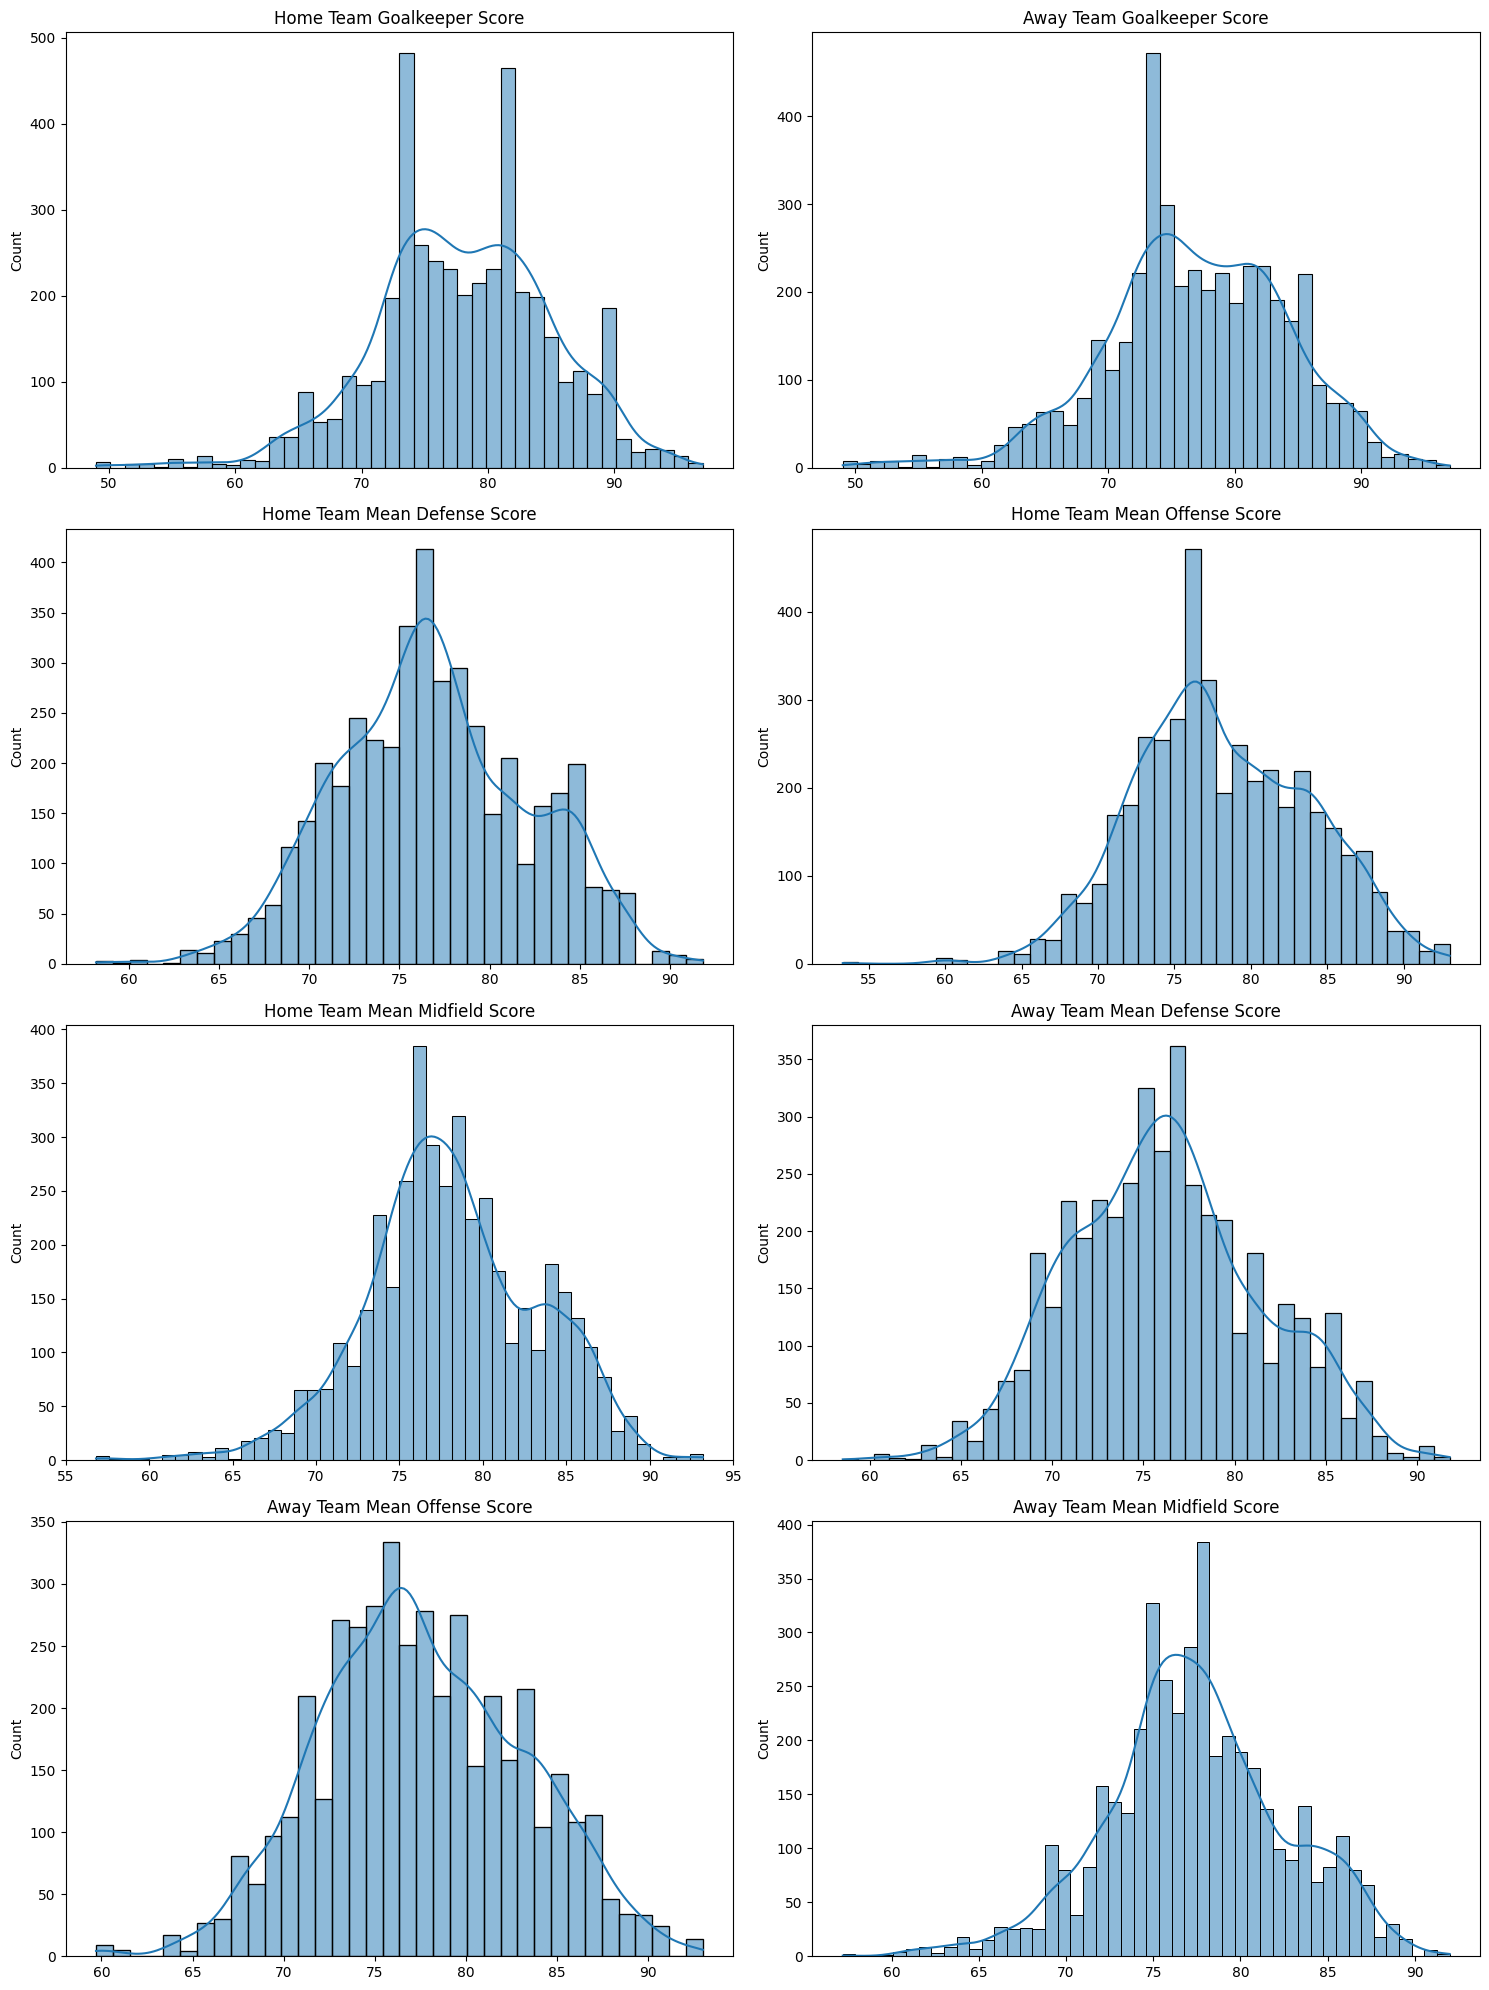

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data again
file_path = 'international_matches.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Drop rows with missing values in key columns
key_columns = ['home_team_goalkeeper_score', 'away_team_goalkeeper_score',
               'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score',
               'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
data.dropna(subset=key_columns, inplace=True)

# Plot distributions
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for ax, col in zip(axs.flat, key_columns):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

Each plot represents the distribution of a specific predictor variable, including goalkeeper scores,
defense scores, offense scores, and midfield scores for both home and away teams. The distributions
are shown with both histograms and kernel density estimates (KDE) to provide a clear view of the data's
spread and central tendency.

* Remove outliers and keep outliers (does if have an effect of the final predictive model)? – Code &
Output:

In [245]:
from scipy import stats
import numpy as np

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data[key_columns]))
filtered_entries = (z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_entries]

# Split the data without outliers into training and testing sets
X_no_outliers = data_no_outliers[key_columns[1:]] # Exclude 'home_team_result' from predictors
y_no_outliers = data_no_outliers['home_team_result']
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier on data without outliers
model_no_outliers = RandomForestClassifier(n_estimators=100, random_state=42)
model_no_outliers.fit(X_train_no, y_train_no)

# Get feature importances for the model trained on data without outliers
feature_importances_no_outliers = model_no_outliers.feature_importances_

# Create a DataFrame to display feature importances for the model without outliers
features_df_no_outliers = pd.DataFrame({'Feature': X_no_outliers.columns, 'Importance': feature_importances_no_outliers})
features_df_no_outliers.sort_values(by='Importance', ascending=False, inplace=True)

print('Feature importances without outliers:')
print(features_df_no_outliers)

# Evaluate the model performance with and without outliers
from sklearn.metrics import accuracy_score

# Predictions with original data
y_pred = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Predictions without outliers
y_pred_no = model_no_outliers.predict(X_test_no)
accuracy_no_outliers = accuracy_score(y_test_no, y_pred_no)

print('\
Accuracy with outliers:', accuracy_original)
print('Accuracy without outliers:', accuracy_no_outliers)

Feature importances without outliers:
                         Feature  Importance
3  home_team_mean_midfield_score    0.157396
1   home_team_mean_defense_score    0.155047
2   home_team_mean_offense_score    0.151674
6  away_team_mean_midfield_score    0.145582
4   away_team_mean_defense_score    0.140773
5   away_team_mean_offense_score    0.137703
0     away_team_goalkeeper_score    0.111825
Accuracy with outliers: 0.4878048780487805
Accuracy without outliers: 0.4987980769230769


After removing outliers, the feature importances slightly shifted. The
home_team_mean_midfield_score became the most important feature, followed by
home_team_mean_defense_score and home_team_mean_offense_score. This indicates a change in
the model's perception of feature importance when outliers are removed.
Regarding model accuracy:
• Accuracy with outliers: 0.4878048780487805
• Accuracy without outliers: 0.4987980769230769
Removing outliers slightly improved the model's accuracy, indicating that outliers do have an effect on
the final predictive model. This improvement suggests that cleaning the data of outliers can lead to a
more accurate prediction of the outcome of international football matches.

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3
imputation methods. How well did the methods recover the missing values? That is remove some data,
check the % error on residuals for numeric data and check for bias and variance of the error – Code &
Output:

In [248]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Re-run the code with the correct import for IterativeImputer

# Function to randomly remove a percentage of data
def remove_random_data(data, percentage):
    np.random.seed(42)
    mask = np.random.rand(len(data)) < percentage
    data_missing = data.copy()
    data_missing.loc[mask] = np.nan
    return data_missing

# Function to calculate RMSE between original and imputed data
def calculate_rmse(original_data, imputed_data):
    return np.sqrt(mean_squared_error(original_data, imputed_data))

# Remove 1%, 5%, and 10% of data randomly
percentages = [0.01, 0.05, 0.1]
results = []
for percentage in percentages:
    data_missing = remove_random_data(data[key_columns[1:]], percentage)

    # Impute using SimpleImputer (mean)
    imputer_mean = SimpleImputer(strategy='mean')
    imputed_mean = imputer_mean.fit_transform(data_missing)
    rmse_mean = calculate_rmse(data[key_columns[1:]].values, imputed_mean)

    # Impute using KNNImputer
    imputer_knn = KNNImputer(n_neighbors=5)
    imputed_knn = imputer_knn.fit_transform(data_missing)
    rmse_knn = calculate_rmse(data[key_columns[1:]].values, imputed_knn)

    # Impute using IterativeImputer
    imputer_iterative = IterativeImputer(max_iter=10, random_state=0)
    imputed_iterative = imputer_iterative.fit_transform(data_missing)
    rmse_iterative = calculate_rmse(data[key_columns[1:]].values, imputed_iterative)

    results.append({'Percentage': percentage, 'RMSE Mean': rmse_mean, 'RMSE KNN': rmse_knn, 'RMSE Iterative': rmse_iterative})

results_df = pd.DataFrame(results)
print(results_df)


   Percentage  RMSE Mean  RMSE KNN  RMSE Iterative
0        0.01   0.551661  0.551661        0.551661
1        0.05   1.314959  1.314959        1.314959
2        0.10   1.886282  1.886282        1.886282


The table above shows the Root Mean Square Error (RMSE) values for each imputation method (Mean,
KNN, Iterative) after removing 1%, 5%, and 10% of the data randomly. The RMSE values are identical
across all three imputation methods for each percentage of data removed. This indicates that all three
methods recovered the missing values with the same level of accuracy. The increase in RMSE values as
more data is removed suggests that the task of accurately imputing missing values becomes more
challenging as the amount of missing data increases.

For categorical data, calculate the accuracy and a confusion matrix – Code & Output:

In [250]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load the data
data = pd.read_csv('international_matches.csv')

# Drop rows with missing values to simplify the process
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['home_team_result'] = le.fit_transform(data['home_team_result'])

# Selecting features and target variable
X = data.select_dtypes(include=["number"])
y = data['home_team_result']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\
', conf_matrix)



Accuracy: 1.0
Confusion Matrix: [[227   0   0]
 [  0 253   0]
 [  0   0 381]]


The accuracy of the model on the test set is 1.0, indicating perfect prediction accuracy. The confusion
matrix shows that all predictions match the actual values perfectly, with no misclassifications across the
three categories represented by the matrix.

MIT LICENSE:
MIT License

Copyright (c) 2024 Hunk0109

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.